# Correlation function for any neighboirs
This jupyter notebook calculate the two spin correlation function for a one-dimensional Ising model.

In [2]:
# math 
import numpy as np
import scipy
from scipy.sparse import csr_matrix, coo_matrix
from scipy.linalg import eig as get_eigs
import math

# plots
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')
import style
import matplotlib.pyplot as plt

### Definitions

In [3]:
nv = 2 # number of neighbors
p = 1.5 # exponent of interactions 1/J^p
magnetic_field = 1
Tem = 1
listJ = 1/np.arange(1,nv+1,1)**p

In [4]:
listJ

array([1.        , 0.35355339])

## Matrix definition
In this section we define the matrix

In [5]:
row = []
col = []
data = []
matrix_range = 2**nv
for i in range(matrix_range):
    row.append(i)
    col.append(i)
    if i < int(matrix_range/2):
        data.append(1)
    else:
        data.append(-1)
pauli_matrix_z = coo_matrix((data, (row, col)), shape=(matrix_range, matrix_range))

In [6]:
pauli_matrix_z.toarray()

array([[ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  0, -1]])

Import function to spin proyections

In [7]:
def digiters_binary_number(num: int,len_padding: int = None):
    """ Return a list of digiter corresponding of the binary representation of a decimal number
    
    Args:
        num: An integer in decimal that want to covert in binary.
        len_padding: An integer to represent the length of the pading. If it is not specify there are not padding.

    Returns:
        A numpy array with the list of digiters correspongin to the binary number representation of the num padding
        with ceros at left

    Raises:
        ValueError: Occur when len_padding is smaller than the lenght of the binary number
    """
    try:
        list_digiter_binary = []
        binary_number = np.array([int(i) for i in list('{0:0b}'.format(num))])
        if len_padding == None:
            
            return binary_number
        else:
            padding = len_padding - len(binary_number)
            list_digiter_binary = np.pad(binary_number,(padding,0),'constant')
    
            return list_digiter_binary
    except ValueError as exc:
        print("Error: len_padding is smaller than the len of the binary number.")
        return exc

In [8]:
list_proyections = np.array([digiters_binary_number(i,nv) for i in range(matrix_range)])
list_proyections = list_proyections*(-2)+1

In [9]:
list_proyections

array([[ 1,  1],
       [ 1, -1],
       [-1,  1],
       [-1, -1]])

In [12]:
row = []
col = []
data = []
for i in range(matrix_range):
    for j in range(matrix_range):
        isNonCero = True
        if nv > 1:
            for sigma in range(1,nv):
                isNonCero = isNonCero and list_proyections[i][sigma] == list_proyections[j][sigma-1]
            if isNonCero:
                row.append(i)
                col.append(j)
                val = math.exp(magnetic_field/Tem*list_proyections[i][0])
                for el in range(nv):
                    val = val*math.exp(listJ[el]/Tem*list_proyections[i][0]*list_proyections[j][el])
                data.append(val)
        else:
            row.append(i)
            col.append(j)
            val = math.exp(h/Tem*list_proyections[i][0])
            for el in range(nv):
                val = val*math.exp((listJ[el]/Tem)*list_proyections[i][0]*list_proyections[j][el])
            data.append(val)

W = coo_matrix((data, (row, col)), shape=(matrix_range, matrix_range))
# W = (W/W.max())

In [13]:
print(W.toarray())

[[10.52289533  5.18851023  0.          0.        ]
 [ 0.          0.          1.42411902  0.7021885 ]
 [ 0.09503088  0.19273355  0.          0.        ]
 [ 0.          0.          0.7021885   1.42411902]]


In [14]:
# result = pauli_matrix_z*W*pauli_matrix_z
# result.toarray()

### Cálculo de los eignevectores y eigenvalores de la matriz 

#### Thermodynamic limit

In [15]:
# from scipy.sparse.linalg import eigs
# eigs(W.toarray(), k=1, which="LM")
W_eigenvalues, W_eigenvectors = get_eigs(W.toarray())
change_basis = np.linalg.inv(W_eigenvectors)
W_eigenvectors = np.transpose(W_eigenvectors)

In [16]:
# print(W_eigenvectors[0],W_eigenvectors[1])
# print(W_eigenvalues)

In [17]:
# # W = np.array([np.array([math.exp(jota/tem+h),math.exp(-jota/tem)]),
# #             np.array([math.exp(-jota/tem),math.exp(jota/tem-h)])])
# # W_eigenvalues, W_eigenvectors = get_eigs(W)
# # W_eigenvectors = np.transpose(W_eigenvectors)
# A = np.array([np.array([math.exp(jota/tem+h),math.exp(-jota/tem)]),
#             np.array([math.exp(-jota/tem),math.exp(jota/tem-h)])])
# print(A)
# A_eigenvalues, A_eigenvectors = get_eigs(A)
# print('eigenvectors',A_eigenvectors)
# print('eigenvalues',A_eigenvalues)
# print(np.array([math.cos(theta_funct(1, 1, 1)/2),math.sin(theta_funct(1, 1, 1)/2)]))

#### Change basis to eigenvectors basis

In [18]:
# change_basis = np.linalg.inv(np.transpose(W_eigenvectors))
# print(change_basis)
# print(np.matmul(np.transpose(W_eigenvectors),change_basis))

In [19]:
### descoment here if matrix is symetric
# def correlation_function(eigenvectors: np.ndarray,
#                          eigenvalues: np.ndarray,
#                          r: int):
#     cor_funct = 0
#     max_eigenval = max(eigenvalues)
#     max_eigenvec = eigenvectors[eigenvalues.argmax()]
#     for eigenvec,eigenval in zip(eigenvectors,eigenvalues): 
#         res = np.matmul(eigenvec,pauli_matrix_z.toarray())
#         res = np.matmul(res,max_eigenvec)
#         cor_funct = cor_funct + ((eigenval/max_eigenval)**r)*(abs(res)**2)
    
#     return cor_funct

### coment here if matrix is symetric
def correlation_function(eigenvectors: np.ndarray,
                         eigenvalues: np.ndarray,
                         r: int):
    cor_funct = 0
    max_eigenval = max(eigenvalues)
    max_eigenvec = eigenvectors[eigenvalues.argmax()]
    linear_coef = np.matmul(change_basis,np.matmul(pauli_matrix_z.toarray(),max_eigenvec))
    for eigenvec,eigenval,l_coef in zip(eigenvectors,eigenvalues,linear_coef): 
        res = np.matmul(max_eigenvec,pauli_matrix_z.toarray())
        res = np.matmul(res,eigenvec)
        cor_funct = cor_funct + ((eigenval/max_eigenval)**r)*res*l_coef
    
    return cor_funct


In [20]:
# max_eigenvec = W_eigenvectors[W_eigenvalues.argmax()]
# linear_coef = np.matmul(change_basis,np.matmul(pauli_matrix_z.toarray(),max_eigenvec))
# print('linear coef: ',linear_coef)
# vec_res = np.array([0,0])
# for a,eigenvec in zip(linear_coef,W_eigenvectors):
#     vec_res = vec_res + a*eigenvec
# print('vec_res: ',vec_res)
# print('vec_original',np.matmul(pauli_matrix_z.toarray(),max_eigenvec))

c:\users\mhjguillermo\appdata\local\programs\python\python37\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'C(r)')

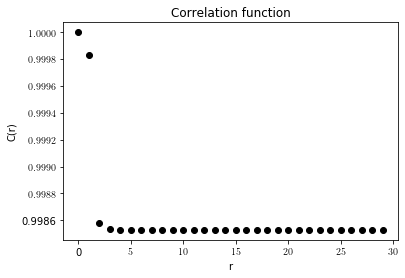

In [21]:
x = np.arange(0,30,1)
y = []
for r in x:
    y.append(correlation_function(W_eigenvectors,W_eigenvalues,r))
plt.plot(x, y, 'o', color='black')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# text_figure = '$k_BT/J={}$, $h/J={}$'.format(tem,magnetic_field)
# plt.text(10, 0.3, text_figure,style='italic',
#         bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
plt.title('Correlation function')
plt.xlabel('r')
plt.ylabel('C(r)')